Dev Patel - 60009200016

Experiment 5
(Test for stationary using ADF test)

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The Augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative 
number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [ ]:
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset 1: FB.csv

In [ ]:
series = pd.read_csv(r'/content/drive/MyDrive/Time Series Analysis/FB.csv', header=0, index_col=0)
series.head()

,ID,Close,Low,High,Volume,C(t-5),C(t-4),C(t-3),C(t-2),C(t-4)>C(t-5),...,CCI200-200,ADO>ADOt-1,HIS,DAX,AORD,N100,N225,SP500,SSE,Closing_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-09,41099,31.730000,31.260000,31.900000,10945600,31.10,30.77,31.20,31.47,0,...,1,0,0,0,0,0,0,0,0,1
2012-07-10,41100,32.169998,31.990000,32.880001,17785200,30.77,31.20,31.47,31.73,1,...,1,0,0,1,0,1,0,0,0,0
2012-07-11,41101,31.469999,31.160000,32.480000,14269500,31.20,31.47,31.73,32.17,1,...,0,1,1,1,0,0,0,0,1,0
2012-07-12,41102,30.969999,30.549999,31.559999,13030300,31.47,31.73,32.17,31.47,1,...,0,1,0,0,0,0,0,0,1,0
2012-07-13,41103,30.809999,30.600000,31.400000,11300700,31.73,32.17,31.47,30.97,1,...,0,0,1,1,1,1,1,0,1,0


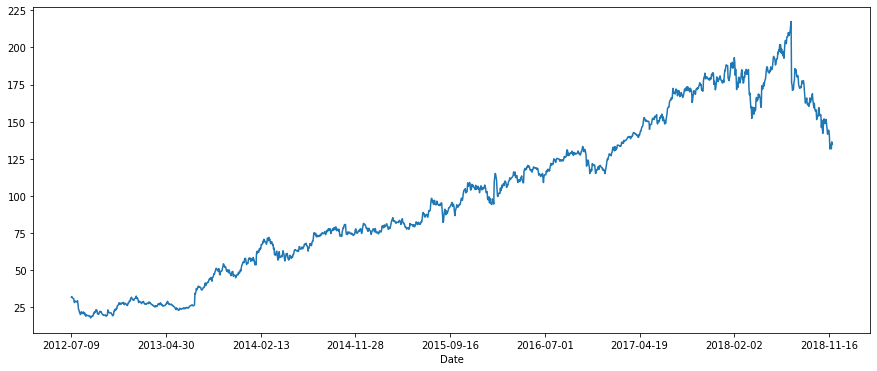

In [ ]:
series['Close'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data. 
    #T is simply the calculated difference represented in units of standard error. 
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','No of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

**ADF test is conducted with the following assumptions:**

Null Hypothesis (HO): Series is non-stationary or series has a unit root.
Alternate Hypothesis(HA): Series is stationary or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(HO):**

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary, else otherwise.

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic               -1.159171
p-value                       0.690908
No Lags Used                  5.000000
No of Observations Used    1602.000000
Critical Value (1%)          -3.434439
Critical Value (5%)          -2.863346
Critical Value (10%)         -2.567731
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


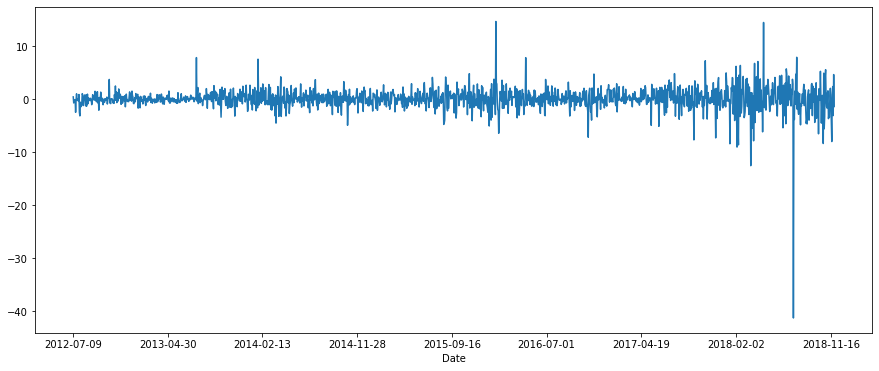

In [ ]:
series['Close'].diff().plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'].diff().dropna(),'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic              -19.926185
p-value                       0.000000
No Lags Used                  4.000000
No of Observations Used    1602.000000
Critical Value (1%)          -3.434439
Critical Value (5%)          -2.863346
Critical Value (10%)         -2.567731
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


a. Calculate the following:

> i.	Test Statistic -19.926185

> ii.	p-value 0.000000

> iii.	No Lags Used 4.000000

> iv.	Number of Observations Used 1602.000000

> v.	Critical Value

> 
*   1%   : -3.434439
*   5%   : -2.863346
*   10%  : -2.567731

b.	Conclude if the time series data contains unit roots or not.

> The time series data does not contain any unit roots

c. 	Also, infer if the data is stationary or not.
> Data is stationary.


d. Apply differencing if the data is not stationary.

> As data is stationary, there is no reason to apply differencing.





## Dataset 2: Monthly Milk Production

In [ ]:
milk = pd.read_csv(r'/content/drive/MyDrive/Time Series Analysis/monthly-milk-production-pounds.csv', header=0, index_col=0)
milk.head()

,Monthly milk production: pounds per cow
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [ ]:
milk.rename(columns = {'Monthly milk production: pounds per cow':'Milk_Production'}, inplace = True)
milk.dropna(inplace = True)

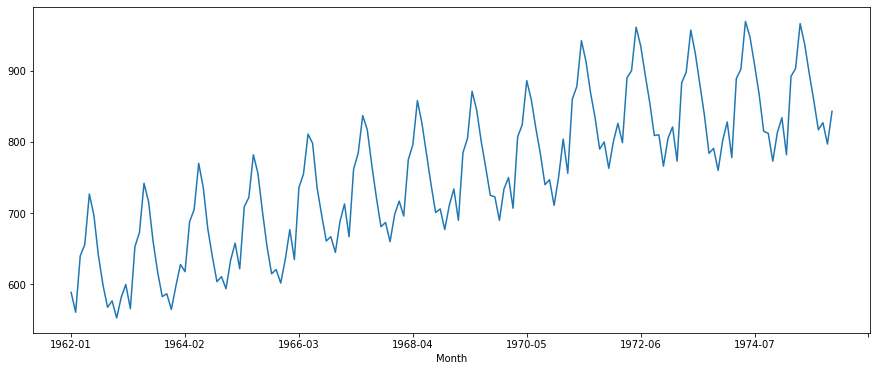

In [ ]:
milk['Milk_Production'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(milk['Milk_Production'],'Milk_Production')

Results of Dickey-Fuller Test for column: Milk_Production
Test Statistic              -1.303812
p-value                      0.627427
No Lags Used                13.000000
No of Observations Used    154.000000
Critical Value (1%)         -3.473543
Critical Value (5%)         -2.880498
Critical Value (10%)        -2.576878
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


a. Calculate the following:

> i.	Test Statistic -1.303812

> ii.	p-value 0.627427

> iii.	No Lags Used 13.000000

> iv.	Number of Observations Used 154.000000

> v.	Critical Value

> 
*   1%   : -3.473543
*   5%   : -2.880498
*   10%  : -2.576878

b.	Conclude if the time series data contains unit roots or not.

> The time series data contains unit roots.

c. 	Also, infer if the data is stationary or not.
> Data is not stationary.


d. Apply differencing if the data is not stationary.

> We apply first differencing as follows:





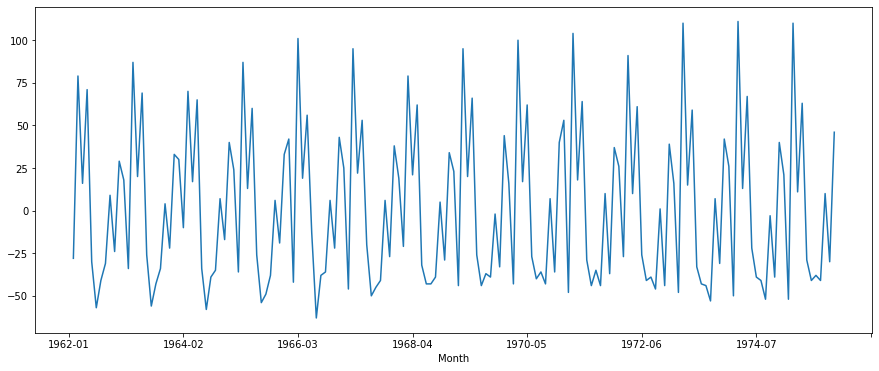

In [ ]:
milk['Milk_Production'].diff().plot(figsize=(15,6))

In [ ]:
milk_firstdiff = milk['Milk_Production'].diff()
Augmented_Dickey_Fuller_Test_func(milk_firstdiff.dropna(),'Milk Production')

Results of Dickey-Fuller Test for column: Milk Production
Test Statistic              -3.054996
p-value                      0.030068
No Lags Used                14.000000
No of Observations Used    152.000000
Critical Value (1%)         -3.474121
Critical Value (5%)         -2.880750
Critical Value (10%)        -2.577013
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


a. Calculate the following:

> i.	Test Statistic -3.054996

> ii.	p-value  0.030068

> iii.	No Lags Used 14.000000

> iv.	Number of Observations Used 152.000000

> v.	Critical Value

> 
*   1%   : -3.474121
*   5%   : -2.880750
*   10%  : -2.577013

b.	Conclude if the time series data contains unit roots or not.

> The time series data does not contain unit roots anymore.

c. 	Also, infer if the data is stationary or not.
> Data is now stationary.


d. Apply differencing if the data is not stationary.

> Now the data is stationary.



